# Experiment 1: Baseline testing

As a simple baseline test, we'll train three simple models using default settings on three computer vision datasets. The three models are:
- Logistic regresssion
- Multi-layer perceptrons (MLPs)
- Convolutional neural networks (CNNs)

The three datasets are:
- MNIST
- FashionMNIST
- CIFAR-10

### Results

The validation accuracy of these experiments are shown in this table.

|          | MNIST | Fashion-MNIST | CIFAR-10 |
|----------|----------|----------|----------|
| Logistic regression| 92.3 | 83.9 | 34.7 |
| MLP | 97.1 | 86.4 | 43.3 |
| CNN | 98.9 | 91.4 | 65.2 |

As expected, the CNN model works best across all three datasets. CIFAR-10 is a more challenging model than MNIST and FashionMNST.

#### Imports

In [1]:
import os
import sys
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..')) # Adjust as needed
if project_root not in sys.path:
    sys.path.append(project_root) # add notebook to sys.path


In [2]:
import torch
import matplotlib.pyplot as plt

from computer_vision.utils.train import fit, val_stats
from computer_vision.utils.hparams import (LogisticRegressionHyperParameters, 
                         MLPHyperParameters, 
                         CNNHyperParameters)

In [3]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


### MNIST Experiments

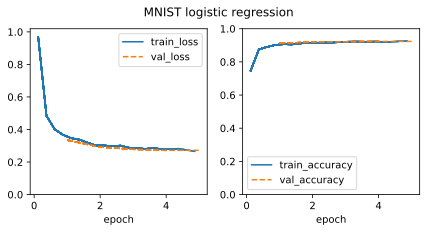

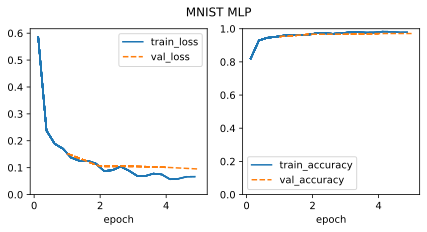

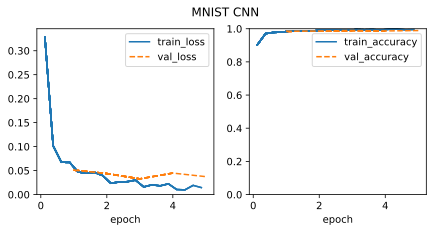

In [4]:
lr_hp = LogisticRegressionHyperParameters(dataset='MNIST', id='MNIST logistic regression')
lr_model = fit(lr_hp, device=device)
mlp_hp = MLPHyperParameters(dataset='MNIST', id="MNIST MLP")
mlp_model = fit(mlp_hp, device=device)
cnn_hp = CNNHyperParameters(dataset='MNIST', id="MNIST CNN")
cnn_model = fit(cnn_hp, device=device)

In [5]:
print(lr_model)
print(mlp_model)
print(cnn_model)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
MLP(
  (fc_layers): ModuleList(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1-2): 2 x Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_out): Linear(in_features=64, out_features=10, bias=True)
)
CNN(
  (convs): ModuleList(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fc_hidden): Linear(in_features=3136, out_features=128, bias=True)
  (fc_out): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [6]:
_, lr_val_accuracy = val_stats(lr_model, lr_hp, device=device)
_, mlp_val_accuracy = val_stats(mlp_model, mlp_hp, device=device)
_, cnn_val_accuracy = val_stats(cnn_model, cnn_hp, device=device)

In [7]:
print(f"Logistic regression validation accuracy: {lr_val_accuracy:.3f}")
print(f"MLP validation accuracy: {mlp_val_accuracy:.3f}")
print(f"CNN validation accuracy: {cnn_val_accuracy:.3f}")

Logistic regression validation accuracy: 0.923
MLP validation accuracy: 0.971
CNN validation accuracy: 0.989


### Fashion-MNIST Experiments

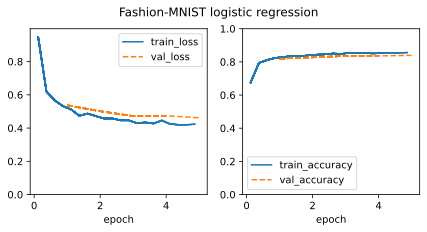

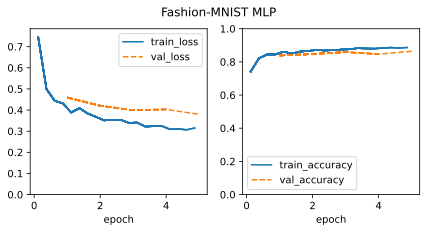

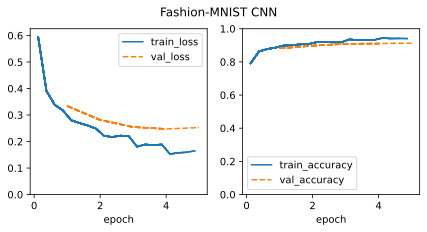

In [8]:
lr_hp = LogisticRegressionHyperParameters(dataset='FashionMNIST', id='Fashion-MNIST logistic regression')
lr_model = fit(lr_hp, device=device)
mlp_hp = MLPHyperParameters(dataset='FashionMNIST', id="Fashion-MNIST MLP")
mlp_model = fit(mlp_hp, device=device)
cnn_hp = CNNHyperParameters(dataset='FashionMNIST', id="Fashion-MNIST CNN")
cnn_model = fit(cnn_hp, device=device)

In [9]:
print(lr_model)
print(mlp_model)
print(cnn_model)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
MLP(
  (fc_layers): ModuleList(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1-2): 2 x Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_out): Linear(in_features=64, out_features=10, bias=True)
)
CNN(
  (convs): ModuleList(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fc_hidden): Linear(in_features=3136, out_features=128, bias=True)
  (fc_out): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [10]:
_, lr_val_accuracy = val_stats(lr_model, lr_hp, device=device)
_, mlp_val_accuracy = val_stats(mlp_model, mlp_hp, device=device)
_, cnn_val_accuracy = val_stats(cnn_model, cnn_hp, device=device)

In [11]:
print(f"Logistic regression validation accuracy: {lr_val_accuracy:.3f}")
print(f"MLP validation accuracy: {mlp_val_accuracy:.3f}")
print(f"CNN validation accuracy: {cnn_val_accuracy:.3f}")

Logistic regression validation accuracy: 0.839
MLP validation accuracy: 0.864
CNN validation accuracy: 0.914


### CIFAR-10 Experiments

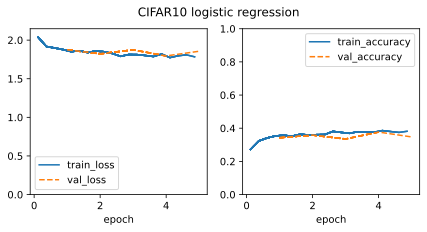

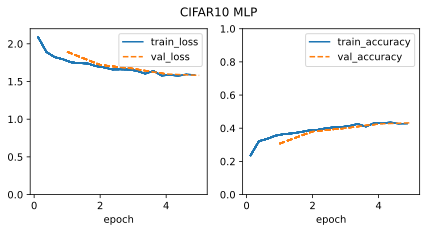

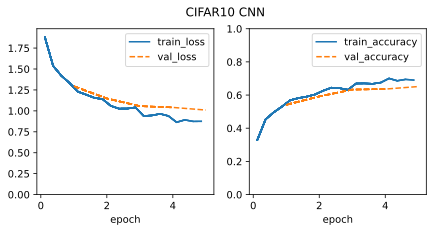

In [12]:
lr_hp = LogisticRegressionHyperParameters(dataset='CIFAR10', id='CIFAR10 logistic regression')
lr_model = fit(lr_hp, device=device)
mlp_hp = MLPHyperParameters(dataset='CIFAR10', id="CIFAR10 MLP")
mlp_model = fit(mlp_hp, device=device)
cnn_hp = CNNHyperParameters(dataset='CIFAR10', id="CIFAR10 CNN")
cnn_model = fit(cnn_hp, device=device)

In [13]:
print(lr_model)
print(mlp_model)
print(cnn_model)

LogisticRegression(
  (linear): Linear(in_features=3072, out_features=10, bias=True)
)
MLP(
  (fc_layers): ModuleList(
    (0): Linear(in_features=3072, out_features=64, bias=True)
    (1-2): 2 x Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_out): Linear(in_features=64, out_features=10, bias=True)
)
CNN(
  (convs): ModuleList(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (fc_hidden): Linear(in_features=4096, out_features=128, bias=True)
  (fc_out): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [14]:
_, lr_val_accuracy = val_stats(lr_model, lr_hp, device=device)
_, mlp_val_accuracy = val_stats(mlp_model, mlp_hp, device=device)
_, cnn_val_accuracy = val_stats(cnn_model, cnn_hp, device=device)

In [15]:
print(f"Logistic regression validation accuracy: {lr_val_accuracy:.3f}")
print(f"MLP validation accuracy: {mlp_val_accuracy:.3f}")
print(f"CNN validation accuracy: {cnn_val_accuracy:.3f}")

Logistic regression validation accuracy: 0.347
MLP validation accuracy: 0.433
CNN validation accuracy: 0.652
